In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')


In [3]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [4]:
df.model_year.max()

2023

In [5]:
df =  df[['engine_displacement',
'horsepower',
'vehicle_weight', 'model_year',
'fuel_efficiency_mpg']]

In [6]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [7]:
df.horsepower.median()

149.0

In [8]:
df.horsepower.isnull().sum()

708

<AxesSubplot: xlabel='fuel_efficiency_mpg', ylabel='Count'>

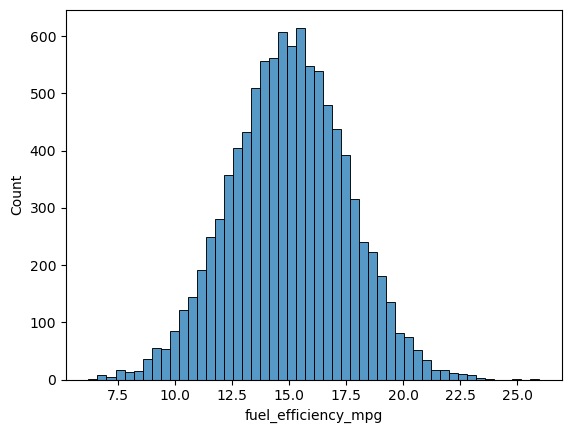

In [9]:
sns.histplot(df.fuel_efficiency_mpg, bins=50)

In [10]:

n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [11]:
n_val, n_test, n_train

(1940, 1940, 5824)

In [12]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [13]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [15]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [16]:

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [17]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']


In [18]:
len(y_train)


5824

In [19]:
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [20]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight']
df_train[base]

,engine_displacement,horsepower,vehicle_weight
0,220,144.0,2535.887591
1,160,141.0,2741.170484
2,230,155.0,2471.880237
3,150,206.0,3748.164469
4,300,111.0,2135.716359
...,...,...,...
5819,260,139.0,2606.972984
5820,280,132.0,4004.214323
5821,210,152.0,2500.175687
5822,250,154.0,2254.313245


In [22]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res =  res + xi[j] * w[j]
        
    return res

In [23]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [24]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [25]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2023 - df.model_year
    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [30]:
def prepare_X_mean(df):
    df = df.copy()
    
    df['age'] = 2023 - df.model_year
    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(df_num.horsepower.mean())
    X = df_num.values
    return X

In [26]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [27]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.5173782638840999

In [31]:
X_train_mean = prepare_X_mean(df_train)
w0, w = train_linear_regression(X_train_mean, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.6116860277110626

In [28]:
X_train

array([[ 220.        ,  144.        , 2535.88759124,   14.        ],
       [ 160.        ,  141.        , 2741.17048439,    4.        ],
       [ 230.        ,  155.        , 2471.88023726,    6.        ],
       ...,
       [ 210.        ,  152.        , 2500.17568746,    3.        ],
       [ 250.        ,  154.        , 2254.31324473,   21.        ],
       [ 210.        ,  152.        , 2435.20360628,   19.        ]])

<AxesSubplot: ylabel='Count'>

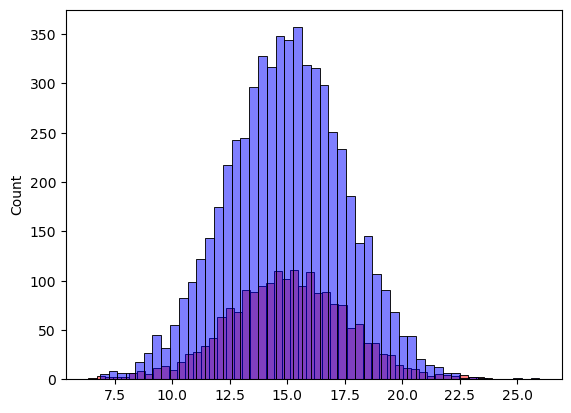

In [29]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

<AxesSubplot: ylabel='Count'>

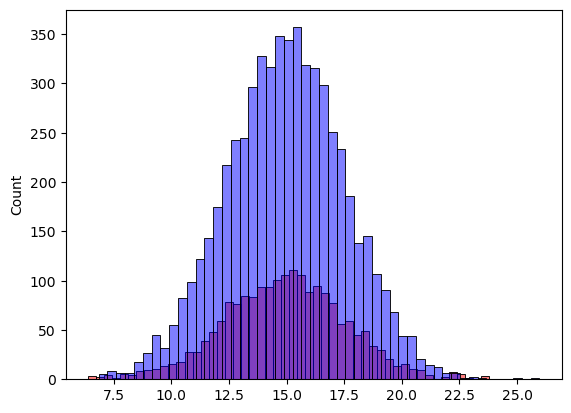

In [32]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [33]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [41]:
for r in [0, 0.01, 0.1, 1, 10 , 100]:
    
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred).round(5)
    print(r, w0, score)

0 29.521240048584275 0.51738
0.01 29.5179021208602 0.51737
0.1 29.48789470473012 0.51736
1 29.191142384447406 0.51874
10 26.522088895080596 0.64076
100 13.854575685755771 2.05898


In [52]:
scores = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    scores.append( rmse(y_val, y_pred))
scores

[0.5206531296297674,
 0.5213388912857116,
 0.5228069974801957,
 0.5159516741173419,
 0.510912946006562,
 0.5283406460166002,
 0.5313910658170795,
 0.5090670387374461,
 0.5147399129350879,
 0.5131865908330948]

In [54]:
np.std(scores)

0.006989446427776457

In [55]:
scores = []
for seed in [9]:
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train,r=0.001)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    scores.append( rmse(y_val, y_pred))
scores

[0.5131850902465792]